In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [98]:

df = pd.read_csv("https://raw.githubusercontent.com/sachinmotwani20/NPTEL-ML_Datasets/main/moons_dataset.csv")

df.head()

,feature1,feature2
0,-0.021371,0.406186
1,0.976700,-0.458323
2,0.904059,-0.376520
3,0.377363,-0.397037
4,-0.841926,0.530587


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1000 non-null   float64
 1   feature2  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [100]:
df.shape

(1000, 2)

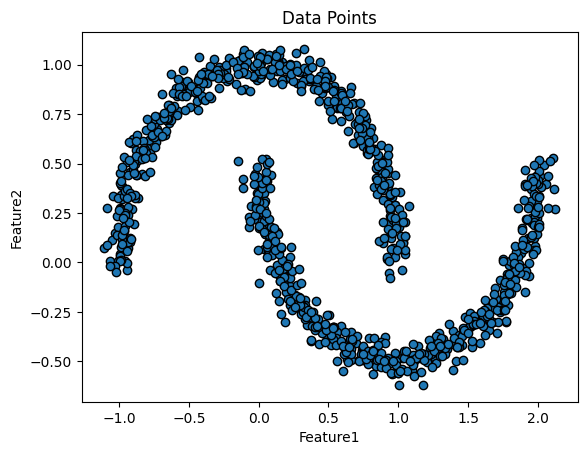

In [101]:
plt.scatter(df["feature1"], df["feature2"], marker= 'o', edgecolors= 'k')
plt.title("Data Points")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

In [102]:
from sklearn.cluster import KMeans

km= KMeans(n_clusters= 2, random_state=42, n_init= 100)
kmeans_label= km.fit_predict(df)

In [103]:
from sklearn.metrics import silhouette_score
k_sil= silhouette_score(df, kmeans_label)
print("silhouette_score Score is: ", k_sil) 

silhouette_score Score is:  0.4887268471194725


In [104]:
from sklearn.cluster import SpectralClustering

model_sc= SpectralClustering(n_clusters= 2, affinity= 'nearest_neighbors', random_state= 42)
sc_labels= model_sc.fit_predict(df)
sc_silhouette= silhouette_score(df, sc_labels)
print("Silhouette Score: " , sc_silhouette)

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score:  0.33440074394139574


Text(0.5, 1.0, 'Spectral clustering ( Silhouette Score:  0.33)')

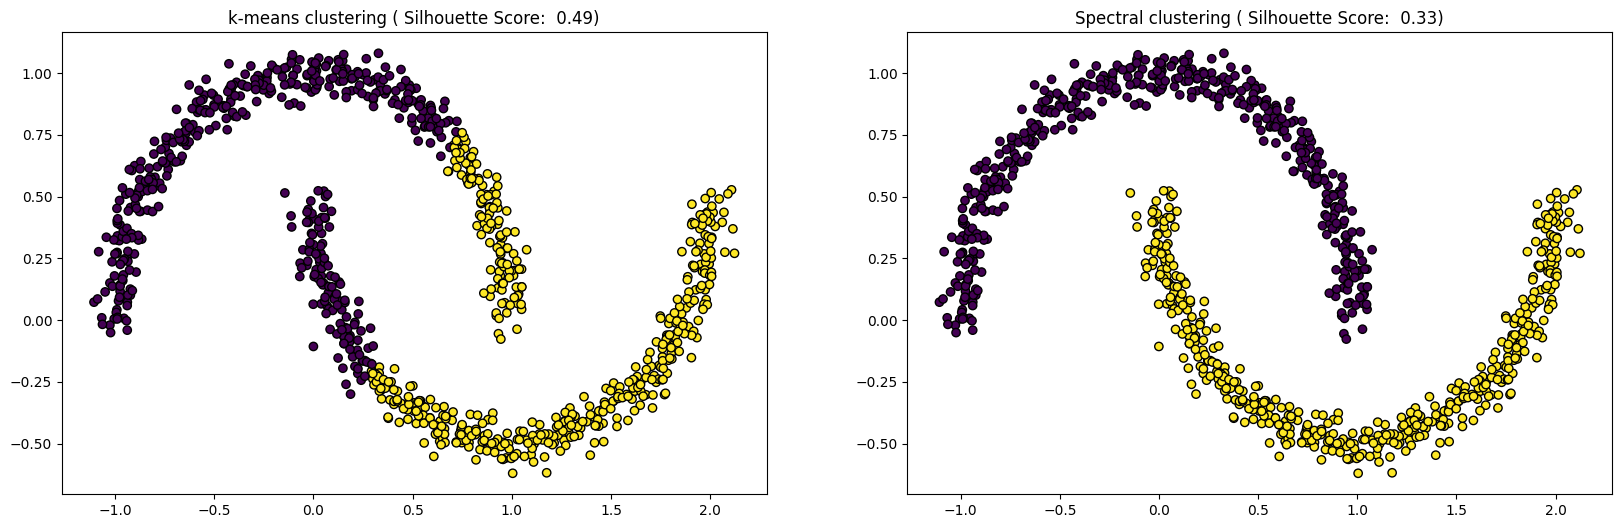

In [105]:
plt.figure(figsize= (20, 6))
plt.subplot(1,2,1)
plt.scatter(df["feature1"], df["feature2"], c= kmeans_label, cmap= 'viridis', marker= 'o', edgecolors= 'k')
plt.title(f"k-means clustering ( Silhouette Score: { k_sil: .2f})")

plt.subplot(1,2,2)
plt.scatter(df["feature1"], df["feature2"], c= sc_labels, cmap= 'viridis', marker= 'o', edgecolors= 'k')
plt.title(f"Spectral clustering ( Silhouette Score: { sc_silhouette: .2f})")


In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

In [ ]:

data = data.dropna(subset=['InvoiceNo'])

data.head(15)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
plt.figure(figsize= (8,6))

plt.scatter(data["UnitPrice"],data["CustomerID"], marker= 'o', edgecolors= 'k')
plt.title("Dataset")
plt.xlabel("UnitPrice")
plt.ylabel("CustomerID")
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer

minibatch_kmeans = MiniBatchKMeans(n_clusters=0.001, n_init='auto')

# numeric_data = data.select_dtypes(include=['float64'])
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Impute missing values (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_data)

# Initialize the MiniBatchKMeans clustering model
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)  # You can specify the number of clusters
cluster_labels = minibatch_kmeans.fit_predict(imputed_data)


In [ ]:
plt.figure(figsize= (8,6))

plt.scatter(data["UnitPrice"],data["CustomerID"], marker= 'o', edgecolors= 'k')
plt.title("Dataset")
plt.xlabel("UnitPrice")
plt.ylabel("CustomerID")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that you have two columns you want to use for the scatter plot, replace 'feature1' and 'feature2' with actual column names.
feature1 = 'Quantity'
feature2 = 'CustomerID'

# Create a DataFrame for the scatter plot
scatter_data = pd.DataFrame({'Feature 1': imputed_data[:, 0], 'Feature 2': imputed_data[:, 1], 'Cluster': cluster_labels})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', data=scatter_data, palette='viridis')
plt.title('MiniBatchKMeans Clustering with Outlier Handling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Initialize the K-Means clustering model
model_km = KMeans(n_clusters=10, random_state=42, n_init=100)

# Fit the model to your imputed data
kmeans_labels = model_km.fit_predict(data_imputed)


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for K-means clustering
kmeans_silhouette = silhouette_score(data_imputed, kmeans_labels)
print("Silhouette Score for K-means Clustering is", kmeans_silhouette)


In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Define the model
model_sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)

# Fit the model and obtain cluster labels
sc_labels = model_sc.fit_predict(data)

# Calculate the silhouette score for Spectral Clustering
sc_silhouette = silhouette_score(data, sc_labels)
print("Silhouette Score for Spectral Clustering is", sc_silhouette)


In [ ]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data["UnitPrice"], data["CustomerID"], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k')
plt.title(f"K-means Clustering (Silhouette Score: {kmeans_silhouette:.2f})")

plt.subplot(1, 2, 2)
plt.scatter(data["UnitPrice"], data["CustomerID"], c=sc_labels, cmap='viridis', marker='o', edgecolors='k')
plt.title(f"Spectral Clustering (Silhouette Score: {sc_silhouette:.2f})")
plt.colorbar(label="Class")
plt.show()
